In [1]:
import os #menejemenisasi file dan folder
# import cv2 
import numpy as np
from sklearn.utils import shuffle
from PIL import Image #library clean data
#library untuk menampilkan gambar
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#library tensorflow untuk pelatihan model 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #library untuk augmentasi gambar
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# from keras import backend as k
# from keras.preprocessing import image

In [2]:
#Direktori data
base_dir = 'dataset'
#Direktori data daun sakit
blast_dir = os.path.join(base_dir, 'train/Blast')
#Direktori data daun sehat
brownspot_dir = os.path.join(base_dir, 'train/BrownSpot')
#Direktori data daun sehat
hispa_dir = os.path.join(base_dir, 'train/Hispa')
#Mengambil semua anama file dalam masing-masing direktori
balst_fnames = os.listdir(blast_dir )
brownspot_fnames = os.listdir(brownspot_dir)
hispa_fnames = os.listdir(hispa_dir)

In [3]:
#check file
print('total data Blast:',len(os.listdir(blast_dir)))
print('total data Brownspot:',len(os.listdir(brownspot_dir)))
print('total data Hispa:',len(os.listdir(hispa_dir)))

total data Blast: 299
total data Brownspot: 300
total data Hispa: 297


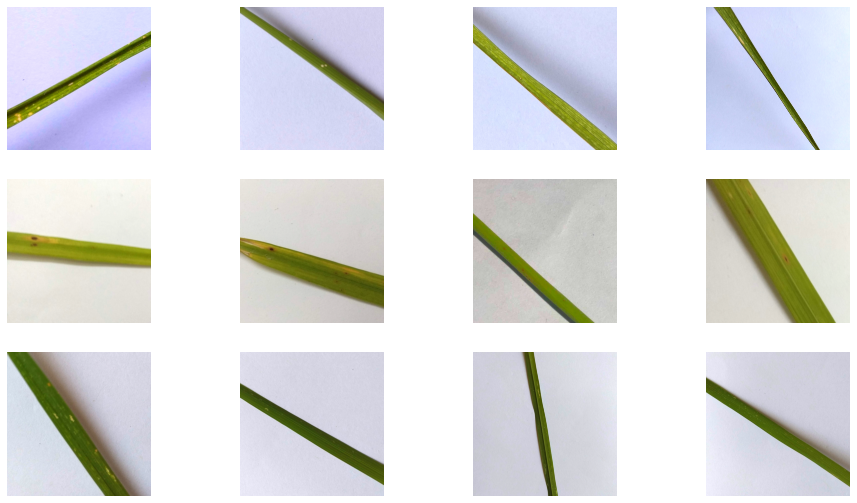

In [4]:
cols = 4
rows = 3

pic_index = 0
#menampilkan gambar file
img = plt.gcf()
img.set_size_inches(cols*4, rows*3) 

pic_index+=4

#menyimpan ke dalam list nama file yang akan ditampilkan
show_blast_img = [os.path.join(blast_dir, fname)
                      for fname in balst_fnames[pic_index-4:pic_index] 
                    ]

show_brownspot_img = [os.path.join(brownspot_dir, fname)
                      for fname in brownspot_fnames[pic_index-4:pic_index]
                    ]
show_hispa_img = [os.path.join(hispa_dir, fname)
                      for fname in hispa_fnames[pic_index-4:pic_index]
                    ]
for i, img_path in enumerate(show_blast_img+show_brownspot_img+show_hispa_img):
    sp = plt.subplot(rows, cols, i + 1)
    sp.axis('off')

    image = mpimg.imread(img_path)
    plt.imshow(image)

plt.show()

In [5]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = 'dataset/train/'
VALID_DATA_DIR = 'dataset/test/'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)
valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 896 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
print(train_generator.class_indices)

{'Blast': 0, 'BrownSpot': 1, 'Hispa': 2}


In [7]:
#create model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (224,224,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

#menampilkan summary/keterangan dari model
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

2022-01-08 13:24:45.673046: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-08 13:24:45.729041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 13:24:45.729928: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce GTX 1050 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.62
pciBusID: 0000:01:00.0
2022-01-08 13:24:45.730474: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2022-01-08 13:24:45.733786: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2022-01-08 13:24:45.736568: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [8]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# file_path = 'models/model_checkpoint-{epoch:02d}-{accuracy:.02f}.h5'
# #Menyimpan model dengan kriteria tertentu
# checkpoint = ModelCheckpoint(file_path,
#                              monitor='val_loss',                            
#                              save_best_only = True,
#                              mode = 'min'
#                             )

In [ ]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps= valid_generator.samples // BATCH_SIZE,
    verbose=1
    )

2022-01-08 13:25:11.606168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 1 of 28
2022-01-08 13:25:24.827080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 3 of 28
2022-01-08 13:25:37.304370: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 4 of 28
2022-01-08 13:25:50.305590: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 5 of 28
2022-01-08 13:26:03.052911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 6 of 28
2022-01-08 13:26:14.862450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 7 of 28
2022-01-08 13:26:27.710183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a w

Train for 28 steps, validate for 1 steps
Epoch 1/20


2022-01-08 13:31:04.050376: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2022-01-08 13:31:17.597091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 1 of 28
2022-01-08 13:31:28.279359: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 2 of 28
2022-01-08 13:31:41.054401: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 3 of 28
2022-01-08 13:31:54.116394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 4 of 28
2022-01-08 13:32:06.613476: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 5 of 28
2022-01-08 13:32:17.064843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a 

 1/28 [>.............................] - ETA: 2:35:59

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17905/3828528361.py", line 8, in <module>
    verbose=1
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 324, in fit
    total_epochs=epochs)
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 123, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2_utils.py", line 86, in execution_function
 

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()
    
save_plots(train_acc, valid_acc, train_loss, valid_loss)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17905/834629364.py", line 1, in <module>
    train_loss = history.history['loss']
NameError: name 'history' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/oddy/anaconda3/envs/deepEnv/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_conte